In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

In [9]:
data_train = pd.read_csv('../archive/sign_mnist_train.csv')
data_test = pd.read_csv('../archive/sign_mnist_test.csv')

In [10]:
image_train = data_train.iloc[0:27455, 1:785].values
label_train = data_train.iloc[0:27455, 0].values

In [11]:
image_test = data_test.iloc[0:7172, 1:785].values
label_test = data_test.iloc[0:7172,0].values

In [12]:
feature, hog_img = hog(image_train[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [13]:
feature.shape

(144,)

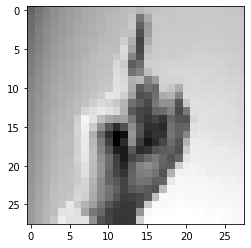

In [14]:
plt.imshow(image_train[0].reshape(28,28), cmap='gray')

In [17]:
label_train[0]

3

<BarContainer object of 144 artists>

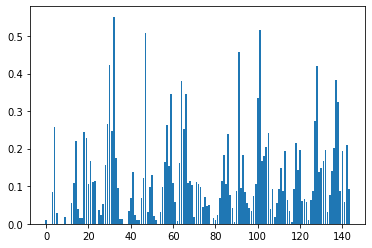

In [18]:
plt.bar(list(range(feature.shape[0])), feature)

In [19]:
n_dims = feature.shape[0]

In [20]:
n_dims

144

In [21]:
n_samples = image_train.shape[0]

In [22]:
n_samples

27455

In [23]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [49]:
for i in range(n_samples):
    X_train[i], _ = hog(image_train[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = label_train[i]

In [50]:
classifier = SVC(decision_function_shape='ovr')

In [51]:
classifier.fit(X_train, y_train)

SVC()

In [52]:
n_samples = image_test.shape[0]

In [53]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [54]:
for i in range(n_samples):
    X_test[i], _ = hog(image_test[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = label_test[i]

In [55]:
y_pred = classifier.predict(X_test)

In [56]:
out_one_hot = classifier.predict(X_test[14].reshape(1, n_dims))

In [57]:
out_one_hot

array([7])

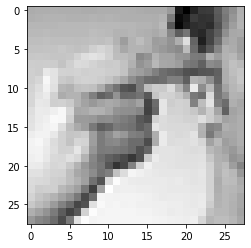

In [58]:
plt.imshow(image_test[14].reshape(28,28), cmap='gray')

In [59]:
cm = confusion_matrix(label_test,y_pred)

In [60]:
cm

array([[331,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 411,   0,   0,   0,   0,   0,   0,   0,  21,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 310,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 245,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 498,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 247,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 332,  16,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0

In [61]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']


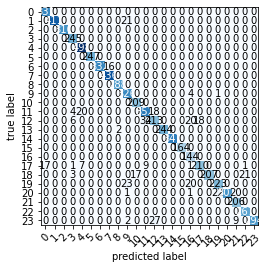

In [62]:
fig, ax = plot_confusion_matrix(conf_mat=cm, class_names = class_names)

In [63]:
from sklearn.metrics import precision_score

In [64]:
precision = precision_score(y_test, y_pred, average=None)

In [65]:
precision

array([0.95114943, 1.        , 1.        , 0.94594595, 0.94857143,
       1.        , 1.        , 0.96460177, 0.99310345, 0.87399464,
       0.92477876, 0.89113924, 0.8255814 , 1.        , 1.        ,
       1.        , 0.75789474, 0.92105263, 1.        , 0.90650407,
       1.        , 0.87659574, 0.92387543, 1.        ])

In [66]:
from sklearn.metrics import recall_score

In [67]:
recall = recall_score(y_test, y_pred, average=None)

In [68]:
recall

array([1.        , 0.95138889, 1.        , 1.        , 1.        ,
       1.        , 0.95402299, 1.        , 1.        , 0.98489426,
       1.        , 0.89340102, 0.73195876, 0.99186992, 1.        ,
       1.        , 1.        , 0.85365854, 0.83467742, 0.83834586,
       0.87283237, 1.        , 1.        , 0.88554217])

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy = accuracy_score(y_test, y_pred)

In [71]:
accuracy

0.948968209704406

In [72]:
f1 = f1_score(label_test,y_pred,average='macro')

In [73]:
f1

0.9457281744944387